In [1]:
import pandas as pd
import numpy as np

import datetime, time
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline
import json, codecs

In [2]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=['#00A6D6',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf'])

#this removes embedded fonts to reduce the file side of pdfs. 
#plt.rcParams['pdf.use14corefonts']= True
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 110
plt.rcParams['figure.figsize'] = [4.0, 3.0]

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.top'] = True

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size']= 8
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelpad'] = 2
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.ymargin'] = 0.05

plt.rcParams['ytick.major.size']=2
plt.rcParams['xtick.major.size']=2
plt.rcParams['ytick.minor.size']=1.5
plt.rcParams['xtick.minor.size']=1.5

plt.rcParams['ytick.major.width']=0.5
plt.rcParams['ytick.minor.width']=0.5
plt.rcParams['xtick.major.width']=0.5
plt.rcParams['xtick.minor.width']=0.5

plt.rcParams['grid.linewidth']=0.5

plt.rcParams['legend.handlelength'] =1# : 1      # the length of the legend lines
plt.rcParams['legend.handleheight'] =0.5#  : 0.7      # the height of the legend handle
plt.rcParams['legend.handletextpad']=0.6# : 0.8      # the space between the legend line and legend text
plt.rcParams['legend.borderaxespad']=0.3# : 0.5      # the border between the axes and legend edge
plt.rcParams['legend.columnspacing']=1.5# : 2.0      # column separation

#ytick.major.width    : 0.8    # major tick width in points
#ytick.minor.width    : 0.6    # minor tick width in points
plt.rcParams['ytick.major.pad'] = 3#    : 3.5      # distance to major tick label in points
plt.rcParams['ytick.minor.pad'] = 3#  : 3.4      # distance to the minor tick label in points
plt.rcParams['xtick.major.pad'] = 3#    : 3.5      # distance to major tick label in points
plt.rcParams['xtick.minor.pad'] = 3#  : 3.4      # distance to the minor tick label in points


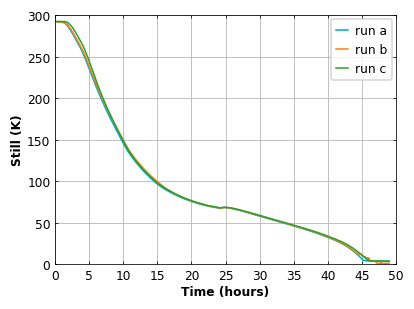

In [7]:
#starts = [4890,5855,6269,7398,8298]
def cooldown300(ax):
    r = json.load(codecs.open('./300to4kelvinpagani.json','r'))

    for k in r:
        o=r[k]
        ax.plot(o['h'],o['T'],label='run '+k)

    #ax.legend(title='Run')
    ax.set_yscale('linear')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Still (K)')
    ax.set_xticks(range(0,51,5))
    ax.grid(True)
    ax.set_ylim(0,300)
    ax.set_xlim(0,50)
    ax.legend()
    
ax1 =  plt.axes()
cooldown300(ax1)
plt.savefig('./plots/300to4kelvinpagani.pdf')


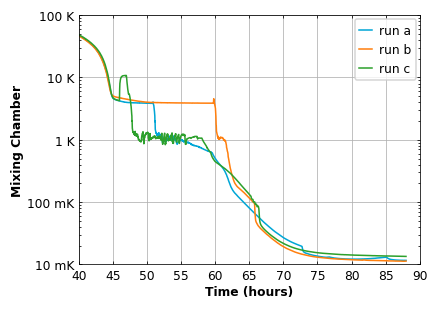

In [9]:
def cooldown_mc(ax):
    r = json.load(codecs.open('./50tobasekelvinpagani.json','r'))
    for k in r:
        o=r[k]
        ax.plot(o['h'],o['T'],label='run '+k)
    length = 90
    offset = 40
    #ax.legend(title='Run')
    ax.set_yscale('log')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Mixing Chamber')
    ax.set_xticks(range(offset,length+1,5))
    ax.grid(True)
    ax.set_ylim(1e-2,80)
    ax.set_xlim(offset,length)
    ax.set_yticks([0.01,0.1,1,10,100])
    ax.set_yticklabels(['10 mK','100 mK','1 K','10 K','100 K'])
    ax.legend()
    
ax1 =  plt.axes()
cooldown_mc(ax1)
plt.savefig('./plots/50tobasekelvinpagani.pdf')


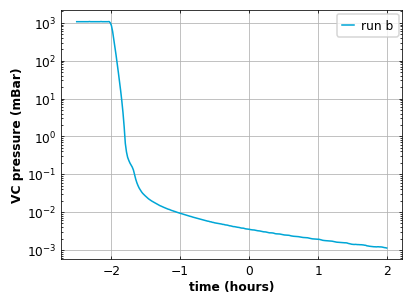

In [10]:
#starts = [4890,5855,6269,7398,8298]

def pumpout(ax): 
    length =4
    offset = -2.5
    r = json.load(codecs.open('./pumpOVpagani.json','r'))

    for k in r:
        o=r[k]
        ax.plot(o['h'],o['P'],label='run '+k)

    #ax.legend(title='Run')
    ax.set_yscale('log')
    ax.set_xlabel('time (hours)')
    ax.set_ylabel('VC pressure (mBar)')
    ax.grid(True)
    ax.legend()
ax1 =  plt.axes()
pumpout(ax1)
plt.savefig('./plots/paganipumpout.pdf')


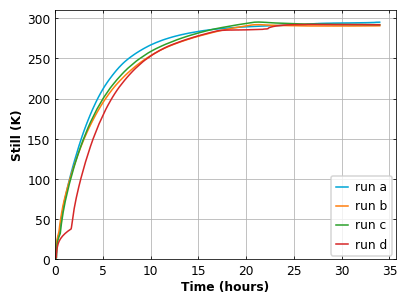

In [11]:
def warmup(ax):
    length =4
    offset = -2.5
    r = json.load(codecs.open('./warmuppagani.json','r'))

    for k in r:
        o=r[k]
        ax.plot(o['h'],o['T'],label='run '+k)

    #ax.legend(title='Run')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Still (K)')
    ax.grid(True)
    ax.set_ylim(0)
    ax.set_xlim(0)
    ax.legend()
    
    
    
ax1 =  plt.axes()
warmup(ax1)
plt.savefig('./plots/warmuppagani.pdf')


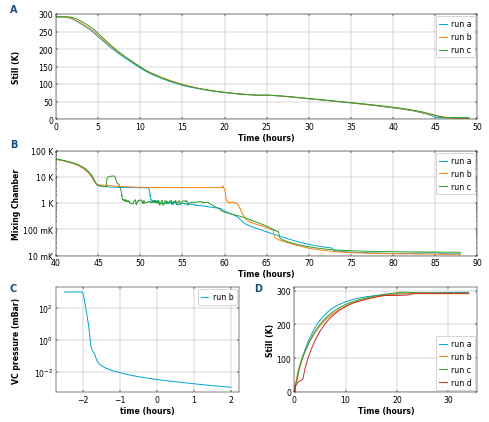

In [16]:
fig = plt.figure(figsize = (7,6),dpi=70)
gs = plt.GridSpec(nrows=3, ncols=2,hspace=0.3, wspace=0.3,width_ratios=[1,1], height_ratios=[1,1, 1],
                 left=0.12,right=0.98,top=0.97,bottom=0.07)


axtop = fig.add_subplot(gs[0,:])
axmid = fig.add_subplot(gs[1,:])
axll =  fig.add_subplot(gs[2,0])
axlr =  fig.add_subplot(gs[2,1])

cooldown300(axtop)
cooldown_mc(axmid)
pumpout(axll)
warmup(axlr)

fig.align_ylabels(axs=[axtop,axmid,axll])
fig.align_xlabels(axs=[axll,axlr])

for cap,pos in zip(
    ['A','B','C','D'],
    [ (0.02,0.97),(0.02,0.65),(0.02,0.31),(0.52,0.31) ] ):
    axtop.annotate(cap,xy=pos,
             xycoords='figure fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold', color="#194c80"
           )
    
plt.savefig('./plots/pagani_performance.pdf',transparent=True)

In [14]:
#color='green'0.1,0.3,0.5

#ff7f0e

0.1*255

25.5

In [64]:
fig.align_ylabels(axs=[axtopleft,axbottom])
fig.align_xlabels(axs=[axtopleft,axtopright])


for ax,cap,pos in zip([axtopleft,axtopright,axbottom],['A','C','B'], [ (0.05,0.94),(0.05,0.5),(0.49,0.94) ] ):
    ax.annotate(cap,xy=pos,
             xycoords='figure fraction', fontname='sans-serif',
             fontsize=10, fontweight='bold'
           )
    
plt.savefig('../plots/fig_system_performance.svg',transparent=True)
plt.savefig('../plots/fig_system_performance.pdf',transparent=True)
plt.savefig('../plots/fig_system_performance.png',transparent=True)
#display.SVG(filename='../plots/fig_system_performance.svg')

NameError: name 'axtopleft' is not defined